# 3 Getting started with neural networks

This chapter covers

     Core components of neural networks
     An introduction to Keras
     Setting up a deep-learning workstation
     Using neural networks to solve basic classification and regression problems

In [32]:
# libraries 

from IPython import display
import numpy as np 
import matplotlib.pyplot as plt 

from keras import layers
from keras import models 
from keras import optimizers
from keras import losses
from keras import metrics
import tensorflow as tf

## 3.1 Anatomy of a neural network

In [ ]:
display.Image("./pic1.PNG")

### Layers: the building blocks of deep learning

* A layer is a data-processing module that takes as input one or
more tensors and that outputs one or more tensors. Some layers are stateless, but
more frequently layers have a state: the layer’s weights, one or several tensors learned
with stochastic gradient descent, which together contain the network’s knowledge.

In [ ]:
# it's a just example for observation.
layer = layers.Dense(32, input_shape=(784,)) # a dense layer with 32 output units 

In [ ]:
# simple example of stacking layers(sequential model)
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

* The second layer didn’t receive an input shape argument—instead, it automatically
inferred its input shape as being the output shape of the layer that came before

### 3.4 Models: networks of layers

* A deep-learning model is a directed, acyclic graph of layers. The most common
instance is a linear stack of layers, mapping a single input to a single output.


* But as you move forward, you’ll be exposed to a much broader variety of network topologies. Some common ones include the following:

     Two-branch networks

     Multihead networks
    
     Inception blocks

The next few chapters will both teach
you explicit principles for building neural networks and help you develop intuition as
to what works or doesn’t work for specific problems.

### Loss functions and optimizers: keys to configuring the learning process

* Once the network architecture is defined, you still have to choose two more things:

   Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand.

   Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

NOTE : 

  * A neural network that has multiple outputs may have multiple loss functions (one per
output). But the gradient-descent process must be based on a single scalar loss value;
so, for multiloss networks, all losses are combined (via averaging) into a single scalar
quantity.

* Fortunately, when it comes to common problems such as classification, regression,
and sequence prediction, there are simple guidelines you can follow to choose the
correct loss. For instance, you’ll use binary crossentropy for a two-class classification
problem, categorical crossentropy for a many-class classification problem, meansquared
error for a regression problem, connectionist temporal classification (CTC)
for a sequence-learning problem, and so on. Only when you’re working on truly new
research problems will you have to develop your own objective functions. In the next
few chapters, we’ll detail explicitly which loss functions to choose for a wide range of
common tasks.


## 3.2 Introduction to Keras

* Keras is a deep-learning framework for Python that provides a convenient way to define and train almost any kind of deep-learning model. Keras was initially developed for researchers, with the aim of enabling fast experimentation.

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# functional API - same model defined like above code 

input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

In [ ]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

## 3.4 Classifying movie reviews: a binary classification example

* Two-class classification, or binary classification, may be the most widely applied kind
of machine-learning problem. In this example, you’ll learn to classify movie reviews as
positive or negative, based on the text content of the reviews.

### The IMDB dataset

In [5]:
from keras.datasets import imdb 

(train_data, train_lbl), (test_data, test_lbl) = imdb.load_data(num_words=10000)

* The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
occurring words in the training data.

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
len(train_data[0])

218

In [ ]:
'''
you’re restricting yourself to the top 10,000 most frequent words, 
no word index will exceed 10,000:
'''
max([max(sequence) for sequence in train_data])

9999

In [ ]:
'''
here’s how you can quickly decode one of these reviews back to English words:
'''
word_index = imdb.get_word_index() # word_index is a dictionary mapping
                                   # words to an integer index

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
a = reverse_word_index.items()
for (i,j) in a:
  if i == 1000:
    print(j)


secret


In [ ]:

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

'''
Decodes the review. Note that the indices are offset by 3 
because 0, 1, and 2 are reserved indices for "padding", 
"start of sequence" and "unknown"
'''
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

In [7]:
# Encoding the integer sequences into a binary matrix

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # creates an all-zero matrix
                                          # of shape (len(sequences), dimension)

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. #sets specific indices of results[i] to 1s 

  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
x_train.shape

(25000, 10000)

In [12]:
x_train[0].shape

(10000,)

In [25]:
# You should also vectorize your labels,
y_train = np.asarray(train_lbl).astype('float32')
y_test = np.asarray(test_lbl).astype('float32')

# Now the data is ready to be fed into a neural network

### Building your network

* A type of network that performs well on such a problem is
a simple stack of fully connected (Dense) layers with
activations:
relu
Dense(16,
'relu')
activation=

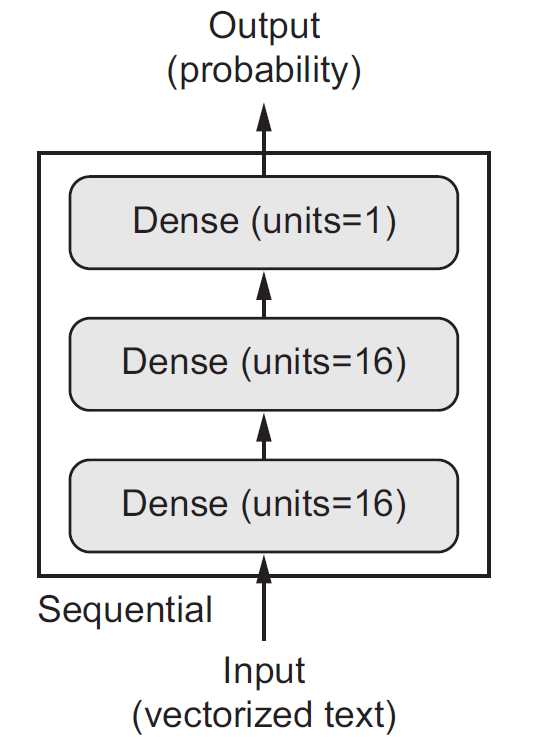

In [13]:
display.Image("./pic2.PNG")

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# Configuring the optimizer

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Using custom losses and metrics 

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### Validating your approach

* In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.

In [26]:
# setting aside a validation set 

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
# Training your model 

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 43ms/step - loss: 0.5062 - acc: 0.7927 - val_loss: 0.3822 - val_acc: 0.8630
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2995 - acc: 0.9010 - val_loss: 0.3005 - val_acc: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2169 - acc: 0.9307 - val_loss: 0.2873 - val_acc: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1737 - acc: 0.9420 - val_loss: 0.2756 - val_acc: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1395 - acc: 0.9563 - val_loss: 0.2832 - val_acc: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1146 - acc: 0.9655 - val_loss: 0.2936 - val_acc: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0947 - acc: 0.9719 - val_loss: 0.3111 - val_acc: 0.8863
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0766 - a

* model.fit() returns a History object. This object has a member
history, which is a dictionary containing data about everything that happened
during training.

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Plotting the training and validation loss


In [31]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

In [32]:
epochs

range(1, 21)

In [33]:
history_dict['acc']

[0.7927333116531372,
 0.9010000228881836,
 0.9306666851043701,
 0.9419999718666077,
 0.956333339214325,
 0.9655333161354065,
 0.9719333052635193,
 0.9792666435241699,
 0.9837999939918518,
 0.9880666732788086,
 0.9904666543006897,
 0.9928666949272156,
 0.9964666962623596,
 0.9964666962623596,
 0.9987999796867371,
 0.9988666772842407,
 0.998533308506012,
 0.9995999932289124,
 0.9995999932289124,
 0.9999333620071411]

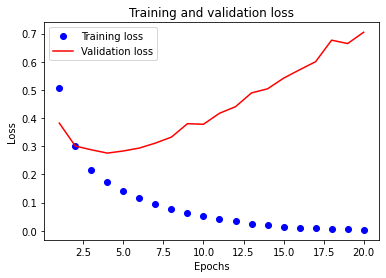

In [35]:
plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo is for 'blue dot'
plt.plot(epochs, val_loss_values, 'r', label='Validation loss') # r is for 'solid red line'
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy

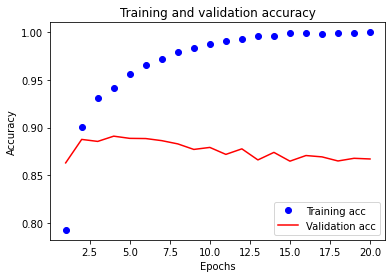

In [40]:
plt.clf() # clears the figure 

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, history_dict['acc'] , 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'r', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() # shows for which line belong 
plt.show()

### COMMENT 

* As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradient
descent
optimization—the quantity you’re trying to minimize should be less with
every iteration.

* BUT that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of what we warned against earlier: a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you’re seeing is overfit
ting:
after the second epoch, you’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

### IMPORTANT 

* to prevent overfitting, you could stop training after three epochs. In
general, you can use a range of techniques to mitigate overfitting

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4641 - accuracy: 0.8280
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2684 - accuracy: 0.9072
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2055 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2902 - accuracy: 0.8846


In [42]:
results

[0.29023003578186035, 0.8846399784088135]

### RESULT 

* This fairly naive approach achieves an accuracy of 88%. With state-of-the-art
approaches, you should be able to get close to 95%.

### Using a trained network to generate predictions on new data

* After having trained a network, you’ll want to use it in a practical setting. You can generate
the likelihood of reviews being positive by using the predict method:

In [43]:
model.predict(x_test)

array([[0.19723232],
       [0.99984014],
       [0.8402973 ],
       ...,
       [0.0891217 ],
       [0.06789337],
       [0.56084645]], dtype=float32)

### Further experiments

The following experiments will help convince you that the architecture choices you’ve
made are all fairly reasonable, although there’s still room for improvement:

 You used two hidden layers. Try using one or three hidden layers, and see how
doing so affects validation and test accuracy.

 Try using layers with more hidden units or fewer hidden units: 32 units, 64 units,
and so on.

 Try using the mse loss function instead of binary_crossentropy.

 Try using the tanh activation (an activation that was popular in the early 
days of
neural networks) instead of relu

## 3.5 Classifying newswires: a multiclass classification example

* you saw how to classify vector inputs into two mutually exclusive
classes using a densely connected neural network. But what happens when you
have more than two classes?

* In this section, you’ll build a network to classify Reuters newswires into 46 mutually
exclusive topics. Because you have many classes, this problem is an instance of multiclass
classification; and because each data point should be classified into only one category,
the problem is more specifically an instance of single-label, multiclass classification.
If each data point could belong to multiple categories (in this case, topics), you’d be
facing a multilabel, multiclass classification problem

### 3.6 The Reuters dataset

* You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

In [1]:
# libraries 

from keras.datasets import reuters

In [2]:
# Loading the Reuters dataset
(train_data, train_lbl), (test_data, test_lbl) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
# Here’s how you can decode it back to words.

word_index = reuters.get_word_index()
word_index

565248/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [8]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [10]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'''
note that the indices are offset by 3 because 0,1, and 2 are reserved indices for "padding", "start of sequence" and "unknown".
'''

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
train_lbl[10]

3

### Preparing the data

* You can vectorize the data with the exact same code as in the previous example

In [14]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.

  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [17]:
x_train.shape

(8982, 10000)

In [19]:
x_train[0].shape

(10000,)

* To vectorize the labels, there are two possibilities: you can cast the label list as an integer
tensor, or you can use one-hot encoding. One-hot encoding is a widely used format
for categorical data, also called categorical encoding

In [26]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  
  for i, label in enumerate(labels):
    results[i, label] = 1.

  return results

one_hot_train_labels = to_one_hot(train_lbl) # vectorized training labels
one_hot_test_labels = to_one_hot(test_lbl)   # vectorized test labels

In [27]:
'''
Note that there is a built-in way to do this in Keras, 
which you’ve already seen in action in the MNIST example:
'''
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_lbl)
one_hot_test_labels = to_categorical(test_lbl)

In [42]:
one_hot_train_labels[:10].shape

(10, 46)

In [30]:
train_lbl[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

### Building your network

* This topic-classification problem looks similar to the previous movie-review classification
problem: in both cases, you’re trying to classify short snippets of text. But there is
a new constraint here: the number of output classes has gone from 2 to 46. The
dimensionality of the output space is much larger.

IMPORTANT 

* In the previous
example, you used 16-dimensional intermediate layers, but a 16-dimensional space may
be too limited to learn to separate 46 different classes: such small layers may act as information
bottlenecks, permanently dropping relevant information.

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # output layer

There are two other things you should note about this architecture:

 You end the network with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector
(each dimension) will encode a different output class.

 The last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

In [34]:
# Compiling the model 
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validating your approach 

* Let’s set apart 1,000 samples in the training data to use as a validation set.

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [36]:
# Now, let’s train the network for 20 epochs.

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 32ms/step - loss: 2.4071 - accuracy: 0.5338 - val_loss: 1.6191 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3643 - accuracy: 0.7058 - val_loss: 1.2976 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0410 - accuracy: 0.7746 - val_loss: 1.1424 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8283 - accuracy: 0.8200 - val_loss: 1.0488 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6548 - accuracy: 0.8631 - val_loss: 0.9808 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5189 - accuracy: 0.8924 - val_loss: 0.9498 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4177 - accuracy: 0.9162 - val_loss: 0.9240 - val_accuracy: 0.8120
Epoch 8/20
16

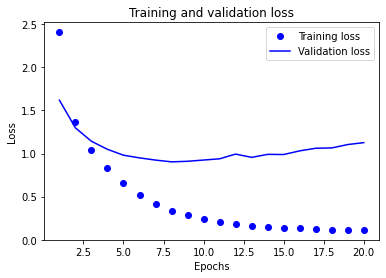

In [37]:
# finally, let’s display its loss  curves 
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

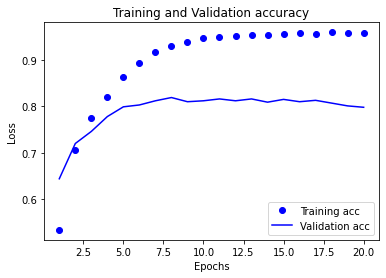

In [39]:
# plotting the training and validation accuracy 
plt.clf() # clears the figure 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

IMPORTANT 

* The network begins to overfit after nine epochs.

###  Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

In [43]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs=9, batch_size=512, 
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.8755 - accuracy: 0.4604 - val_loss: 1.9810 - val_accuracy: 0.6170
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.5936 - accuracy: 0.6802 - val_loss: 1.3868 - val_accuracy: 0.7050
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.1334 - accuracy: 0.7544 - val_loss: 1.1616 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8842 - accuracy: 0.8092 - val_loss: 1.0477 - val_accuracy: 0.7690
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6968 - accuracy: 0.8529 - val_loss: 0.9817 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5621 - accuracy: 0.8857 - val_loss: 0.9269 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4469 - accuracy: 0.9085 - val_loss: 0.9072 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [44]:
results

[1.025273323059082, 0.771148681640625]

In [46]:
import copy 
test_labels_copy = copy.copy(test_lbl)
np.random.shuffle(test_labels_copy)

hits_array = np.array(test_lbl) == np.array(test_labels_copy)

In [48]:
hits_array.shape

(2246,)

In [50]:
float(np.sum(hits_array)) / len(test_lbl)

0.1892252894033838

In [53]:
np.sum([False, False])

0

### Generating predictions on new data

* You can verify that the predict method of the model instance returns a probability
distribution over all 46 topics. Let’s generate topic predictions for all of the test data.

In [54]:
# generating predictions for new data
predictions = model.predict(x_test)

In [56]:
predictions[0]

array([4.2882253e-05, 4.2747186e-05, 8.0811933e-06, 1.3178933e-01,
       8.6078721e-01, 2.4221381e-05, 2.1613331e-04, 1.6506389e-06,
       1.3100863e-03, 3.7766229e-05, 7.7762888e-05, 7.3310785e-04,
       3.6430018e-05, 2.8692192e-04, 3.7002033e-06, 3.6623435e-06,
       7.3220651e-04, 1.4924702e-04, 4.8970967e-05, 2.4328650e-04,
       1.1790833e-03, 4.5360188e-04, 1.0151424e-06, 1.1363522e-05,
       2.0142355e-05, 3.0150107e-04, 2.6818846e-06, 1.7192297e-05,
       2.6545583e-04, 2.4622554e-05, 1.2447659e-04, 1.2505693e-05,
       5.3474399e-05, 5.1768013e-05, 4.5704375e-05, 1.2363546e-05,
       1.9128693e-04, 3.7185753e-05, 8.3479927e-07, 4.9091637e-04,
       7.3887240e-06, 6.6438872e-05, 6.8434051e-06, 4.2748492e-05,
       1.3817145e-06, 2.6219234e-06], dtype=float32)

In [57]:
predictions[0].shape

(46,)

In [58]:
# The coefficients in this vector sum to 1:
np.sum(predictions[0])

1.0

In [59]:
# The largest entry is the predicted class—the class with the highest probability
np.argmax(predictions[0])

4

### A different way to handle the labels and the loss

* We mentioned earlier that another way to encode the labels would be to cast them as
an integer tensor, like this:

In [60]:
y_train = np.array(train_lbl)
y_test = np.array(test_lbl)


* The only thing this approach would change is the choice of the loss function. The loss
function used in listing 3.21, categorical_crossentropy, expects the labels to follow
a categorical encoding. With integer labels, you should use sparse_categorical_
crossentropy:

In [61]:
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

### The importance of having sufficiently large intermediate layers

* The final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what
happens when you introduce an information bottleneck by having intermediate layers
that are significantly less than 46-dimensional

In [62]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.2146 - accuracy: 0.3166 - val_loss: 2.6423 - val_accuracy: 0.3840
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.2616 - accuracy: 0.4295 - val_loss: 2.0181 - val_accuracy: 0.5250
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6659 - accuracy: 0.5905 - val_loss: 1.5669 - val_accuracy: 0.5990
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3252 - accuracy: 0.6421 - val_loss: 1.4243 - val_accuracy: 0.6400
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1241 - accuracy: 0.7240 - val_loss: 1.3103 - val_accuracy: 0.6990
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9952 - accuracy: 0.7415 - val_loss: 1.2633 - val_accuracy: 0.7010
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9012 - accuracy: 0.7612 - val_loss: 1.2824 - val_accuracy: 0.7070
Epoch 8/20
63/63 [=

* The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional.

* **The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.


### Further experiments

 Try using larger or smaller layers: 32 units, 128 units, and so on.

 You used two hidden layers. Now try using a single hidden layer, or three hidden
layers.

## 3.6 Predicting house prices: a regression example

* Another common type of
machine-learning problem is regression, which consists of predicting a continuous
value instead of a discrete label: for instance, predicting the temperature tomorrow,
given meteorological data; or predicting the time that a software project will take to
complete, given its specifications.

### The Boston Housing Price dataset

In [63]:
# loading the Boston housing dataset
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [64]:
train_data.shape

(404, 13)

In [66]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [67]:
test_data.shape

(102, 13)

In [69]:
# The targets are the median values of owner-occupied homes, 
# in thousands of dollars:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

In [70]:
# Normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

'''
Note that the quantities used for normalizing the test data are computed using the
training data. You should never use in your workflow any quantity computed on the
test data, even for something as simple as data normalization.
'''

'\nNote that the quantities used for normalizing the test data are computed using the\ntraining data. You should never use in your workflow any quantity computed on the\ntest data, even for something as simple as data normalization.\n'

### Building your network

* so few samples are available, you’ll use a very small network with two hidden
layers, each with 64 units. In general, the less training data you have, the worse overfitting
will be, and using a small network is one way to mitigate overfitting.

In [71]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

LAST NOTE: 

* You’re also monitoring a new metric during training: mean absolute error (MAE). It’s
the absolute value of the difference between the predictions and the targets. For
instance, an MAE of 0.5 on this problem would mean your predictions are off by $500
on average.

### Validating your approach using K-fold validation

* 1) As a consequence, the validation scores might change a lot depending on which data
points you chose to use for validation and which you chose for training

* 2) the validation
scores might have a high variance with regard to the validation split. This would pre
vent
you from reliably evaluating your model


* *****The best practice in such situations is to use K-fold cross-validation (see figure 3.11).
It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating
K identical models, and training each one on K – 1 partitions while evaluating on
the remaining partition. The validation score for the model used is then the average of
the K validation scores obtained.****

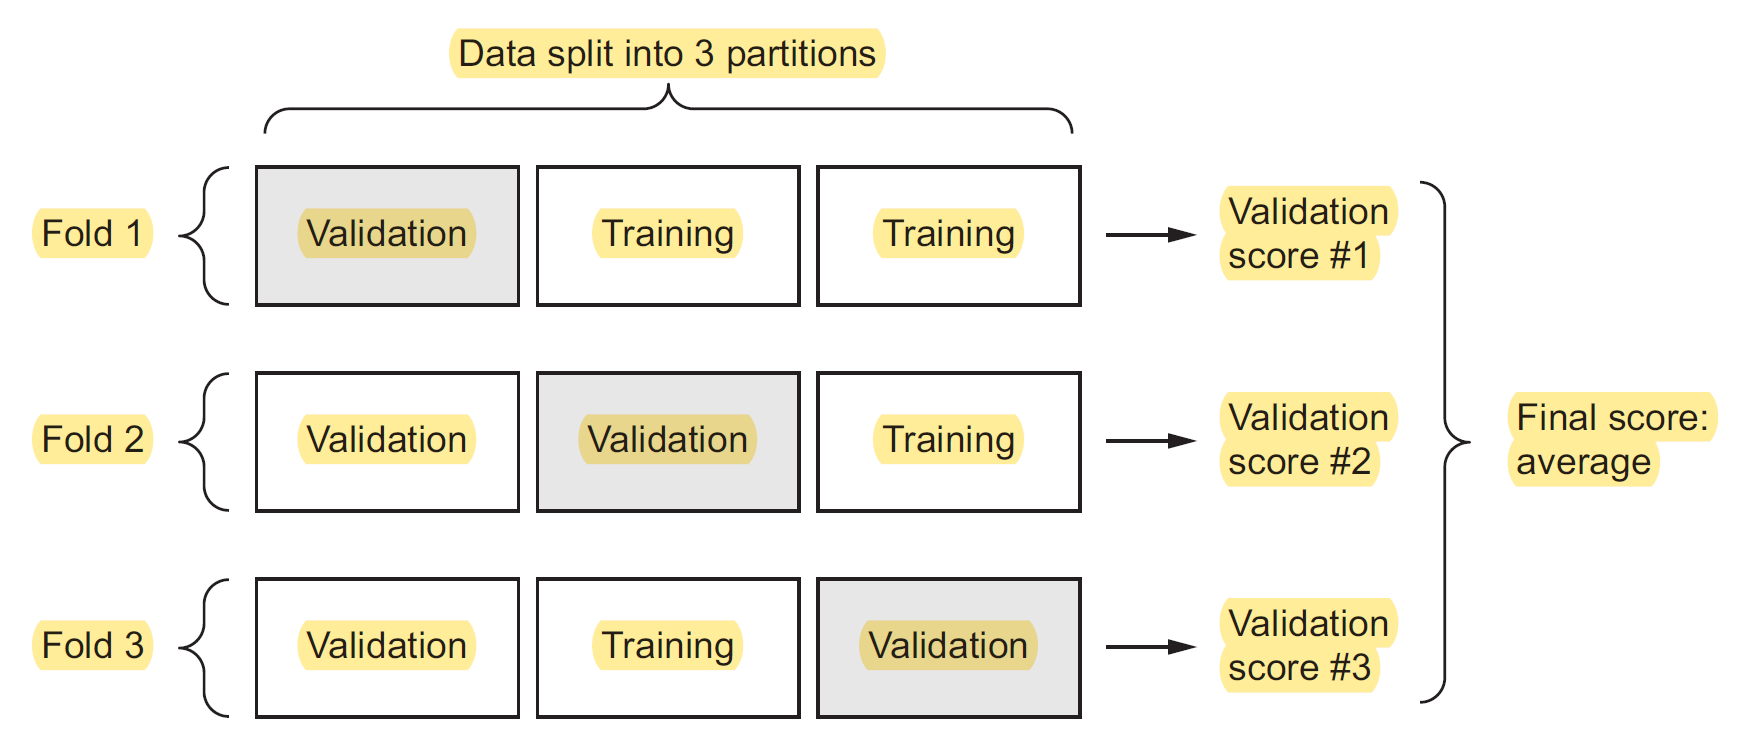

In [72]:
display.Image("./pic3.PNG")

In [77]:
# K-fold validation
import numpy as np 

k = 4 
num_val_samples = len(train_data) // k 
num_epochs = 100 
all_scores = []

In [75]:
num_val_samples

101

In [78]:
# prepares the validation data from partition #k 

for i in range(k):
  print(f'processing fold #{i}')

  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

  all_scores.append(val_mae)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

RESULT 

* The different runs do indeed show rather different validation scores, from 2.6 to 3.2.
The average (3.0) is a much more reliable metric than any single score—that’s the
entire point of K-fold cross-validation.

* In this case, you’re off by $ 3,000 on average,
which is significant considering that the prices range from $10,000 to $50,000.

In [81]:
# Saving the validation logs at each fold

num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)

  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
                                      [train_data[:i * num_val_samples],
                                      train_data[(i + 1) * num_val_samples:]],
                                      axis=0)
  
  partial_train_targets = np.concatenate(
                                      [train_targets[:i * num_val_samples],
                                      train_targets[(i + 1) * num_val_samples:]],
                                      axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=1, verbose=0)
  

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:

  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [82]:
# Plotting validation scores, excluding the first 10 data points

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


NameError: ignored

According to this plot, validation
stops improving significantly after 80 epochs.
MAE
Past that point, you start overfitting.

In [ ]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Wrapping up

Here’s what you should take away from this example:

 Regression is done using different loss functions than what we used for classification.
Mean squared error (MSE) is a loss function commonly used for regression.

 Similarly, evaluation metrics to be used for regression differ from those used for
classification; naturally, the concept of accuracy doesn’t apply for regression. A
common regression metric is mean absolute error (MAE).

 When features in the input data have values in different ranges, each feature
should be scaled independently as a preprocessing step.

 When there is little data available, using K-fold validation is a great way to reliably
evaluate a model.

 When little training data is available, it’s preferable to use a small network with
few hidden layers (typically only one or two), in order to avoid severe overfitting.


## Chapter summary
 You’re now able to handle the most common kinds of machine-learning
tasks on vector data: binary classification, multiclass classification, and scalar
regression. The “Wrapping up” sections earlier in the chapter summarize
the important points you’ve learned regarding these types of tasks.

 You’ll usually need to preprocess raw data before feeding it into a neural
network.

 When your data has features with different ranges, scale each feature
independently as part of preprocessing.

 As training progresses, neural networks eventually begin to overfit and
obtain worse results on never-before-seen data.

 If you don’t have much training data, use a small network with only one or
two hidden layers, to avoid severe overfitting.

 If your data is divided into many categories, you may cause information
bottlenecks if you make the intermediate layers too small.

 Regression uses different loss functions and different evaluation metrics
than classification.

 When you’re working with little data, K-fold validation can help reliably
evaluate your model.